In [21]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn.preprocessing import StandardScaler
writing = pd.read_csv('letter-recognition.data')

writing

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19995,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19996,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19997,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [23]:
x = writing.drop('T', axis = 1)
y = writing['T']


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


C:\Users\haeun\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\haeun\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.497


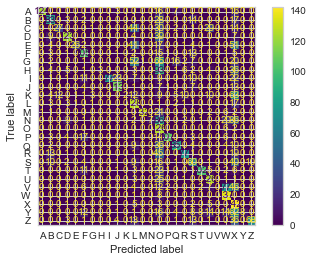

In [29]:
#without standarization
from sklearn.linear_model import Perceptron
perceptron = Perceptron(random_state=42,
               max_iter=10,
               tol=0.001)
perceptron.fit(x_train, y_train)


print(perceptron.score(x_test, y_test))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(perceptron, x_test, y_test)
plt.show()

C:\Users\haeun\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Perceptron was fitted without feature names
  warnings.warn(
C:\Users\haeun\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Perceptron was fitted without feature names
  warnings.warn(


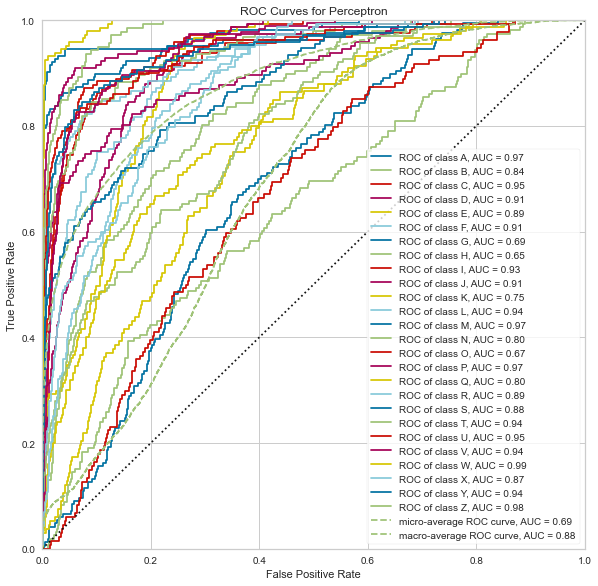

<AxesSubplot:title={'center':'ROC Curves for Perceptron'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [36]:
class_list=np.unique(y)
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(perceptron, classes=class_list,size=(700,700))
visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)   
visualizer.show()

In [37]:
sc = StandardScaler(copy=True, with_mean=True, with_std=True)
x_sctrain = sc.fit_transform(x_train)
x_sctest = sc.fit_transform(x_test)

In [38]:
perceptron.fit(x_sctrain, y_train)


print(perceptron.score(x_sctest, y_test))

0.49375


C:\Users\haeun\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


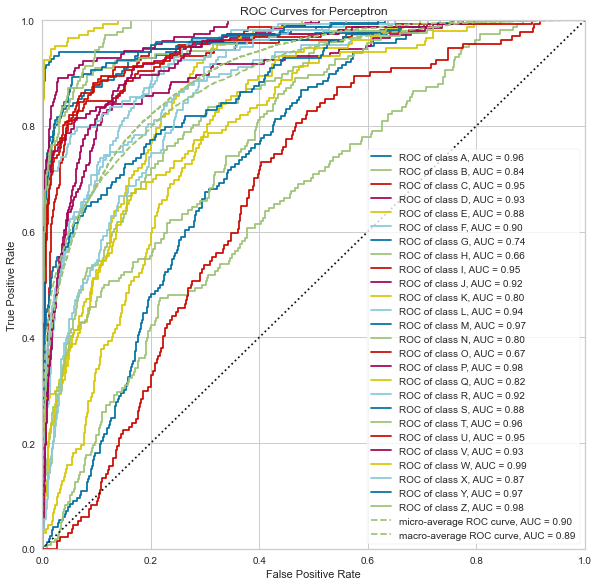

<AxesSubplot:title={'center':'ROC Curves for Perceptron'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [39]:
class_list=np.unique(y)
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(perceptron, classes=class_list,size=(700,700))
visualizer.fit(x_sctrain, y_train)        # Fit the training data to the visualizer
visualizer.score(x_sctest, y_test)        # Evaluate the model on the test data
visualizer.show()